#  LA CRIME DATA

## EAD PART

In [1]:
#All the imports here

import pandas as pd 
import numpy as np # linear algebra
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import seaborn as sns
import matplotlib.patches as mpatches
import folium
import csv
import matplotlib
from __future__ import print_function
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm


In [2]:
#Read CSV File
data_files = ['C:/Users/Abul Hasan/Downloads/Crime_Data_from_2020_to_Present.csv\Crime_Data_from_2020_to_Present.csv','C:/Users/Abul Hasan/Downloads/Crime_Data_from_2010_to_2019.csv/Crime_Data_from_2010_to_2019.csv']
df_crime_report = pd.concat(map(lambda file: pd.read_csv(file, parse_dates = ['Date Rptd','DATE OCC','TIME OCC']), data_files))
df_crime_report.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,10304468,2020-01-08,2020-01-08,2230,3.0,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,NaN
1,190101086,2020-01-02,2020-01-01,0330,1.0,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,NaN
2,201220752,2020-09-16,2020-09-16,1230,12.0,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,NaN
3,191501505,2020-01-01,2020-01-01,1730,15.0,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,NaN
4,191921269,2020-01-01,2020-01-01,0415,19.0,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,NaN


In [3]:
#check the columns
df_crime_report.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA '],
      dtype='object')

In [4]:
#check the shape of the dataset
df_crime_report.shape

(2444416, 29)

In [5]:
#Index Area Name
df_crime_report.columns = list(map(str, df_crime_report.columns))
df_crime_report_area=df_crime_report.set_index('AREA NAME')
#See how dataframe is changed after indexing Area Name
df_crime_report_area.head()
#Drop duplicates
#df_crime_report["AREA NAME"].drop_duplicates()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
AREA NAME,,,,,,,,,,,,,,,,,,,,,
Southwest,10304468,2020-01-08,2020-01-08,2230,3.0,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,NaN
Central,190101086,2020-01-02,2020-01-01,0330,1.0,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,NaN
77th Street,201220752,2020-09-16,2020-09-16,1230,12.0,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,NaN
N Hollywood,191501505,2020-01-01,2020-01-01,1730,15.0,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,NaN
Mission,191921269,2020-01-01,2020-01-01,0415,19.0,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,NaN


In [6]:
criminal_in_areas = np.zeros(21)
criminal_in_areas

#Create the array with 21 columns
arearows=["77th Street",
"Central",
"Devonshire",
"Foothill",
"Harbor",
"Hollenbeck",
"HollyWood",
"Mission",
"N HollyWood",
"Newton",
"Northeast",
"Olympic",
"Pacific",
"Rampart",
"Southeast",
"SouthWest",
"Topanga",
"Van Nuys",
"West LA",
"West Valley",
"Wilshire",]



In [7]:
#create a dataframe with only Area names
df_areanames=df_crime_report["AREA NAME"]
df_areanames.head()


0      Southwest
1        Central
2    77th Street
3    N Hollywood
4        Mission
Name: AREA NAME, dtype: object

In [8]:
#Count the crime per area
for index,item in enumerate(df_areanames):
    if item=="77th Street":
        criminal_in_areas[0]+=1
    elif item=="Central":
        criminal_in_areas[1]+=1
    elif item=="Devonshire":
        criminal_in_areas[2]+=1
    elif item=="Foothill":
        criminal_in_areas[3]+=1
    elif item=="Harbor":
        criminal_in_areas[4]+=1
    elif item=="Hollenbeck":
        criminal_in_areas[5]+=1
    elif item=="Hollywood":
        criminal_in_areas[6]+=1
    elif item=="Mission":
        criminal_in_areas[7]+=1
    elif item=="N Hollywood":
        criminal_in_areas[8]+=1
    elif item=="Newton":
        criminal_in_areas[9]+=1
    elif item=="Northeast":
        criminal_in_areas[10]+=1
    elif item=="Olympic":
        criminal_in_areas[11]+=1
    elif item=="Pacific":
        criminal_in_areas[12]+=1
    elif item=="Rampart":
        criminal_in_areas[13]+=1
    elif item=="Southeast":
        criminal_in_areas[14]+=1
    elif item=="Southwest":
        criminal_in_areas[15]+=1
    elif item=="Topanga":
        criminal_in_areas[16]+=1
    elif item=="Van Nuys":
        criminal_in_areas[17]+=1
    elif item=="West LA":
        criminal_in_areas[18]+=1
    elif item=="West Valley":
        criminal_in_areas[19]+=1
    elif item=="Wilshire":
        criminal_in_areas[20]+=1

In [9]:
#Create a dataframe from above array and show it
df_crime_counter=pd.DataFrame(criminal_in_areas,index=arearows)
df_crime_counter

,0
77th Street,166970.0
Central,117707.0
Devonshire,109301.0
Foothill,91237.0
Harbor,106541.0
Hollenbeck,90918.0
HollyWood,116661.0
Mission,117080.0
N HollyWood,130775.0
Newton,116223.0


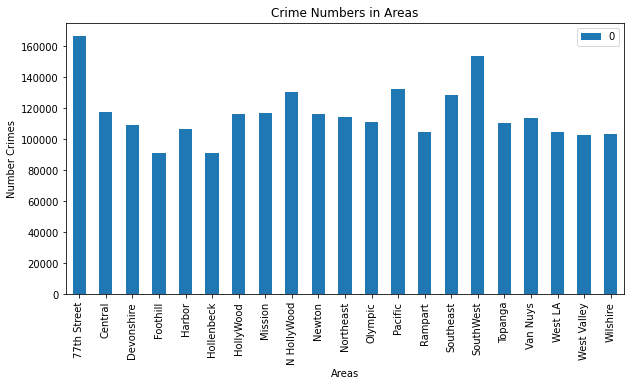

In [10]:
#Create a plot from created dataframe

df_crime_counter.plot(kind='bar',stacked=False,figsize=(10,5))
plt.title('Crime Numbers in Areas')
plt.ylabel('Number Crimes')
plt.xlabel('Areas')

plt.show()

### 77th Street hat the most crimes and Hollenbeck the less.

In [11]:
#replacing vict age null with mean
df_crime_report.drop(df_crime_report[df_crime_report['Vict Age'] < 1].index, axis=0, inplace=True)
print(df_crime_report['Vict Age'].min())
df_crime_report = df_crime_report[(df_crime_report['Vict Sex'] == "X") | (df_crime_report['Vict Sex'] == "M") | (df_crime_report['Vict Sex'] == "F")]

df_crime_report = df_crime_report[(df_crime_report['Vict Descent'] == "W") | (df_crime_report['Vict Descent'] == "H") | (df_crime_report['Vict Descent'] == "B")  | (df_crime_report['Vict Descent'] == "O") | (df_crime_report['Vict Descent'] == "A")]

print(df_crime_report['Vict Age'].min())

df_mean_by_Area=df_crime_report.groupby(["AREA NAME"]).mean()
#df_mean_by_Area
df_crime_report['Vict Age'].min()
df_crime_report.head()

2
2


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,10304468,2020-01-08,2020-01-08,2230,3.0,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,NaN
3,191501505,2020-01-01,2020-01-01,1730,15.0,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,NaN
5,200100501,2020-01-02,2020-01-01,0030,1.0,Central,163,1,121,"RAPE, FORCIBLE",...,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534,NaN
6,200100502,2020-01-02,2020-01-02,1315,1.0,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631,NaN
8,200100507,2020-01-04,2020-01-04,0200,1.0,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398,NaN


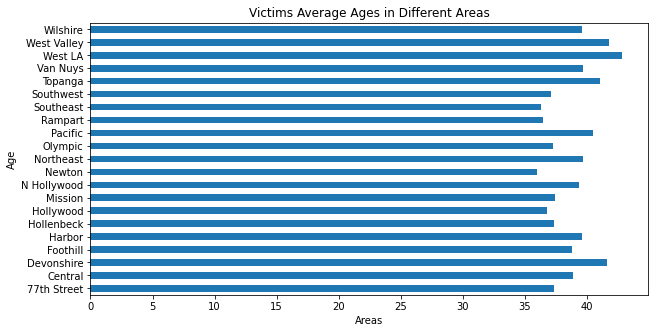

In [12]:
#Create plot for Victim Average ages in different areas

df_mean_by_Area["Vict Age"].plot(kind="barh",stacked=False,figsize=(10,5))
plt.title('Victims Average Ages in Different Areas')
plt.ylabel('Age')
plt.xlabel('Areas')

plt.show()

### Newton has the youngest criminals and Topanga has the oldest.

array([<AxesSubplot:ylabel='0'>], dtype=object)

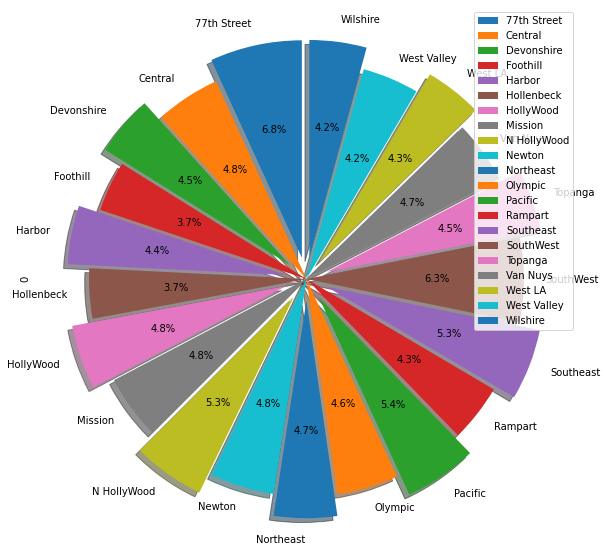

In [13]:
#PIE CHART for the above data

explode_list = [0.1, 0, 0.1, 0, 0.1, 0,0.1, 0, 0.1, 0, 0.1, 0,0.1, 0, 0.1, 0, 0.1, 0,0.1, 0, 0.1]
df_crime_counter.plot(kind="pie",figsize=(15,10),autopct='%1.1f%%',startangle=90, shadow=True,subplots=True,explode=explode_list)

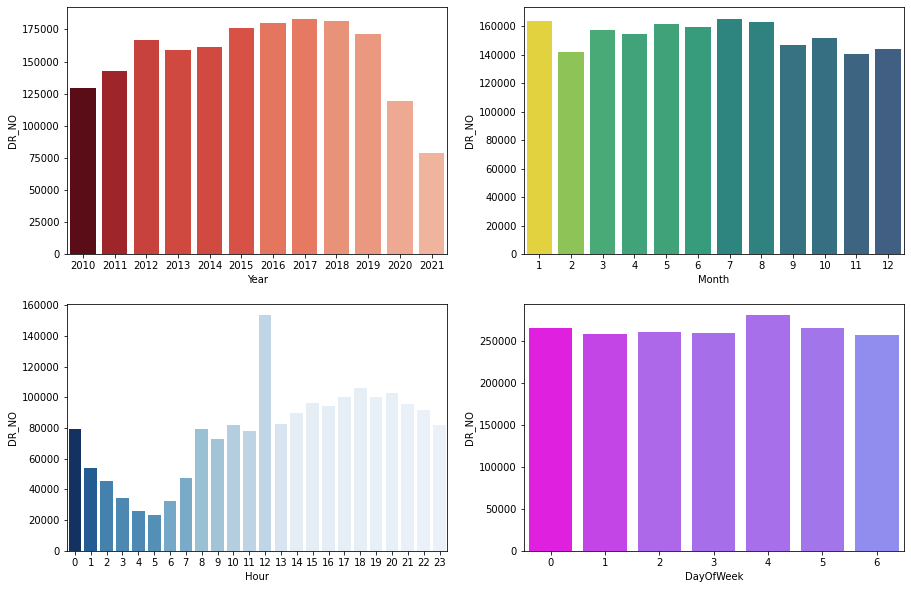

In [14]:
#Graphs for number of crimes vs Day, Month, Year and HOUR

df_crime_report['DayOfWeek'] = df_crime_report['DATE OCC'].dt.weekday
df_crime_report['Month'] = df_crime_report['DATE OCC'].dt.month
df_crime_report['Year'] = df_crime_report['DATE OCC'].dt.year
df_crime_report['Hour'] = pd.to_datetime(df_crime_report['TIME OCC'], format='%H%M').dt.hour
df_crime_report['dayOfMonth'] = df_crime_report['DATE OCC'].dt.day

year = df_crime_report.groupby('Year').count().iloc[:,0]
month = df_crime_report.groupby('Month').count().iloc[:,0]
hour = df_crime_report.groupby('Hour').count().iloc[:,0]
dayofweek = df_crime_report.groupby('DayOfWeek').count().iloc[:, 0]

figure, axs = plt.subplots(2,2, figsize = (15,10))

data = df_crime_report.groupby('Crm Cd').count()
data = data['DATE OCC'].sort_values(ascending=False)

sns.barplot(x=year.index, y= year,ax = axs[0][0],palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))
sns.barplot(x=month.index, y= month,ax = axs[0][1],palette=cm.ScalarMappable(cmap='viridis').to_rgba(data.values))
sns.barplot(x=hour.index, y= hour,ax = axs[1][0],palette=cm.ScalarMappable(cmap='Blues').to_rgba(data.values))
sns.barplot(x=dayofweek.index, y= dayofweek,ax = axs[1][1],palette=cm.ScalarMappable(cmap='cool').to_rgba(data.values))
plt.show()


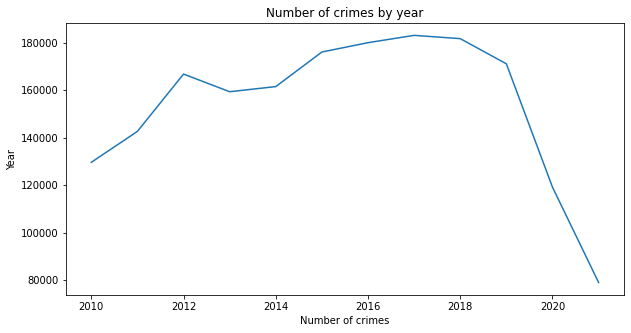

In [15]:
#Line graph for Number of crimes vs Year
df_crime_report['Year']=df_crime_report.Year
df_crime_report.groupby([df_crime_report.Year]).size().plot(kind='line',figsize=(10,5),stacked=False)
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()

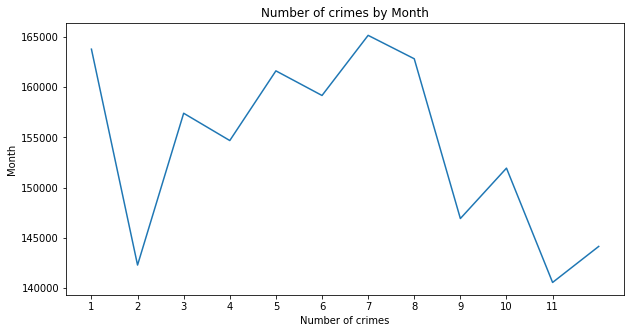

In [16]:
#Line graph for NUMBER OF CRIMES vs Month
df_crime_report.groupby([df_crime_report.Month]).size().plot(kind='line',figsize=(10,5),stacked=False)

plt.ylabel('Month')
plt.xlabel('Number of crimes')
plt.xticks(np.arange(1, 12, 1.0))
plt.title('Number of crimes by Month')
plt.show()

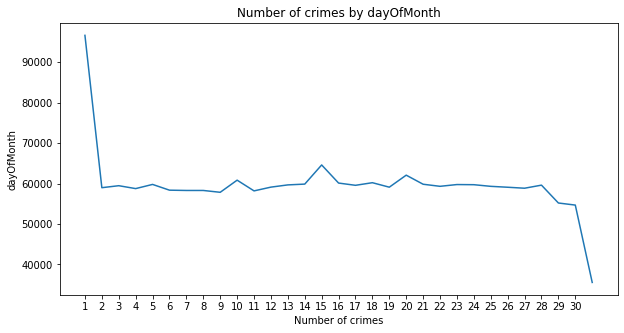

In [17]:
#LINE GRAPH FOR NUMBERS OF CRIMES vs DAY OF MONTH
df_crime_report.groupby([df_crime_report.dayOfMonth]).size().plot(kind='line',figsize=(10,5),stacked=False)
plt.ylabel('dayOfMonth')
plt.xlabel('Number of crimes')
plt.xticks(np.arange(1, 31, 1))
plt.title('Number of crimes by dayOfMonth')
plt.show()

In [18]:
df_cr=pd.DataFrame(df_crime_report['Crm Cd Desc'].value_counts())



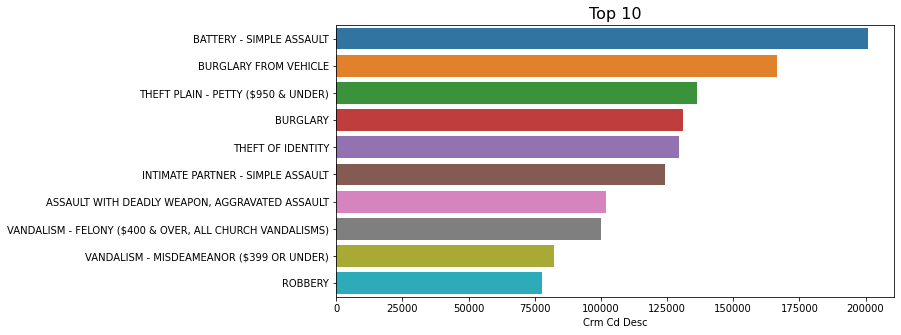

In [19]:
#TOP 10 CRIMES
plt.figure(figsize=(10,5))
#ax2 =  plt.subplot2grid((1,2),(0,1))
plt.title('Top 10', size=16)
sns.barplot(y=df_cr.head(10).index, x='Crm Cd Desc', data=df_cr.head(10))
#ax2.set_yticklabels(ax2.yaxis.get_ticklabels(), rotation=45)
plt.show()

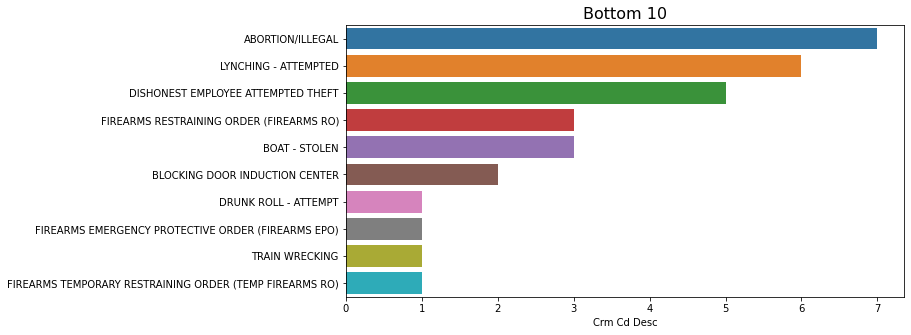

In [20]:
#BOTTOM 10 CRIMES
plt.figure(figsize=(10,5))
#ax2 =  plt.subplot2grid((1,2),(0,1))
plt.title('Bottom 10', size=16)
sns.barplot(y=df_cr.tail(10).index, x='Crm Cd Desc', data=df_cr.tail(10))
#ax2.set_yticklabels(ax2.yaxis.get_ticklabels(), rotation=45)
plt.show()

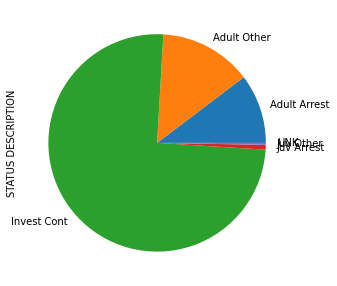

In [21]:
#status description percentagees
df_crime_report.groupby([df_crime_report['Status Desc']]).size().plot(kind='pie',figsize=(10,5),stacked=False)
plt.ylabel('STATUS DESCRIPTION')
plt.show()

2 99


Text(0.5, 1.0, 'Number of crimes by Age')

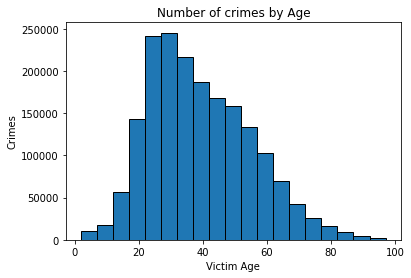

In [22]:
# Vict age vs Crime graphs.

print(df_crime_report['Vict Age'].min(),df_crime_report['Vict Age'].max())
bins = np.arange(df_crime_report['Vict Age'].min(), df_crime_report['Vict Age'].max(), 5)
plt.hist(df_crime_report['Vict Age'], bins=bins, alpha=1, edgecolor='black');
plt.xlabel('Victim Age')
plt.ylabel('Crimes')
plt.title('Number of crimes by Age')

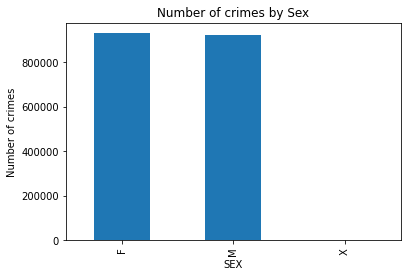

In [23]:
#plot the graph for crimes vs SEx
df_crime_report.groupby([df_crime_report['Vict Sex']]).size().plot(kind='bar')
plt.xlabel('SEX')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by Sex')
#plt.legend(['Female', 'Male','Others'],loc="upper right")
plt.show()

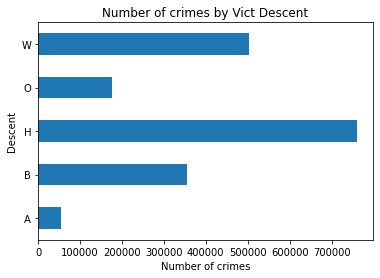

In [24]:
#PLOT the graph for victim descent by number of crimes
df_crime_report.groupby([df_crime_report['Vict Descent']]).size().plot(kind='barh')
plt.ylabel('Descent')
plt.xlabel('Number of crimes')
#plt.legend(['White', 'Other','Hispanic','Black','Asian'],loc="upper right")
plt.title('Number of crimes by Vict Descent')
plt.show()

There are 37700596 words in the combination of all review.
<class 'pandas.core.series.Series'>
<class 'str'>


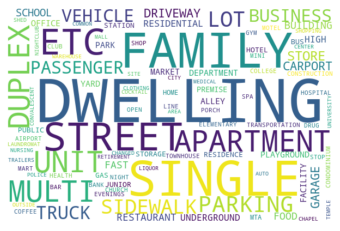

In [25]:
#word cloud for premise description
df_crime_report['Premis Desc'] = df_crime_report['Premis Desc'].fillna('')

text = " ".join(review for review in df_crime_report['Premis Desc'])
print ("There are {} words in the combination of all review.".format(len(text)))

print(type(df_crime_report['Premis Desc'][10]))
#df_crime_report.groupby([df_crime_report['Premis Desc']]).size().plot(kind='barh')

#text = df_crime_report['Premis Desc'][10]
print(type(text))
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white",collocations=False,width=600, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("first_review.png");


There are 27248419 words in the combination of all review.
<class 'pandas.core.series.Series'>
<class 'str'>


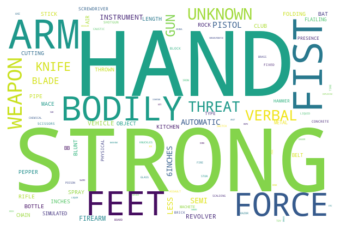

In [26]:
# Word cloud for weapon desc
df_crime_report['Weapon Desc'] = df_crime_report['Weapon Desc'].fillna('')

text = " ".join(review for review in df_crime_report['Weapon Desc'])
print ("There are {} words in the combination of all review.".format(len(text)))

print(type(df_crime_report['Weapon Desc'][10]))
#df.groupby([df['Weapon Desc']]).size().plot(kind='barh')

#text = df_crime_report['Weapon Desc'][10]
print(type(text))
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white",collocations=False,width=600, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("first_review1.png");


In [27]:
df_location_2010=[]
df_location_2011=[]
df_location_2012=[]
df_location_2013=[]
df_location_2014=[]
df_location_2015=[]
df_location_2016=[]
df_location_2017=[]
df_location_2018=[]
df_location_2019=[]
df_location_2020=[]
df_location_2021=[]

df_location_2010_crime_code=list()
df_location_2011_crime_code=list()
df_location_2012_crime_code=list()
df_location_2013_crime_code=list()
df_location_2014_crime_code=list()
df_location_2015_crime_code=list()
df_location_2016_crime_code=list()
df_location_2017_crime_code=list()
df_location_2018_crime_code=list()
df_location_2019_crime_code=list()
df_location_2020_crime_code=list()
df_location_2021_crime_code=list()

In [28]:
#For mapping year wise latitude and longitude+ category

for lat,lon,index,category in zip(df_crime_report['LAT'],df_crime_report['LON'],df_crime_report["DATE OCC"],df_crime_report["Crm Cd Desc"]):
    
    if index.year == 2010:
        df_location_2010.extend([lat,lon])
        df_location_2010_crime_code.append(category)
    if index.year == 2011:
        df_location_2011.extend([lat,lon])
        df_location_2011_crime_code.append(category)
    if index.year == 2012:
        df_location_2012.extend([lat,lon])
        df_location_2012_crime_code.append(category)
    if index.year == 2013:
        df_location_2013.extend([lat,lon])
        df_location_2013_crime_code.append(category)
    if index.year == 2014:
        df_location_2014.extend([lat,lon])
        df_location_2014_crime_code.append(category)
    if index.year == 2015:
        df_location_2015.extend([lat,lon])
        df_location_2015_crime_code.append(category)
    if index.year == 2016:
        df_location_2016.extend([lat,lon])
        df_location_2016_crime_code.append(category)
    if index.year == 2017:
        df_location_2017.extend([lat,lon])
        df_location_2017_crime_code.append(category)
    if index.year == 2018:
        df_location_2018.extend([lat,lon])
        df_location_2018_crime_code.append(category)
    if index.year == 2019:
        df_location_2019.extend([lat,lon])
        df_location_2019_crime_code.append(category)
    if index.year == 2020:
        df_location_2020.extend([lat,lon])
        df_location_2020_crime_code.append(category)
    if index.year == 2021:
        df_location_2021.extend([lat,lon])
        df_location_2021_crime_code.append(category)
#df_location=df_crime_report["Location "].str.replace('(',' ').str.replace(')',' ').str.split(",", n = 1, expand = True) 

In [29]:
print(len(df_location_2010)==len(df_location_2011))


False


In [30]:
df_location_2010_x=[]
df_location_2010_y=[]
i=0

In [31]:
#adds y and x of coordinates.


for element in df_location_2010:
    if i==0:
        df_location_2010_y.append(element)
        i=1
    elif i==1:
        df_location_2010_x.append(element)
        i=0

In [32]:
location_columns=["x","y","category"]
df_locations_2010=pd.DataFrame(list(zip(df_location_2010_x,df_location_2010_y,df_location_2010_crime_code)),columns=location_columns)

In [33]:
df_locations_2010.head()


,x,y,category
0,-118.2695,33.9825,VIOLATION OF COURT ORDER
1,-118.3295,34.1016,VIOLATION OF COURT ORDER
2,-118.2488,34.0387,"RAPE, ATTEMPTED"
3,-118.2577,34.0480,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,-118.2643,34.0389,BURGLARY FROM VEHICLE


In [34]:
#check if only first 1000 records taken are ok
df_location_1000=df_locations_2010.head(1000)


In [35]:
 #Creating map of Las Angeles.


    # define usa's geolocation coordinates
usa_latitude =   34.052235
usa_longitude = -118.243683

 # define the world map centered around Usa with a higher zoom level
usa_map = folium.Map(location=[usa_latitude, usa_longitude], zoom_start=10)


 # display world map
usa_map

In [36]:
#Now I want to show the exact place where the crimes has been commited.


# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_location_1000.y, df_location_1000.x):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
usa_map.add_child(incidents)


In [37]:
#shows category when clicked on location
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
usa_map = folium.Map(location = [usa_latitude, usa_longitude], zoom_start = 10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(usa_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_location_1000.y, df_location_1000.x, df_location_1000.category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
usa_map